<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ-колонки-'toxic'" data-toc-modified-id="Анализ-колонки-'toxic'-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ колонки 'toxic'</a></span></li><li><span><a href="#Очистка-текста" data-toc-modified-id="Очистка-текста-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Очистка текста</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Создание выборок</a></span></li><li><span><a href="#Векторизация-данных" data-toc-modified-id="Векторизация-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Векторизация данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-сбора-данных" data-toc-modified-id="Создание-функции-для-сбора-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание функции для сбора данных</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Pipeline-для-Логистической-регрессии" data-toc-modified-id="Pipeline-для-Логистической-регрессии-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pipeline для Логистической регрессии</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Pipeline-для-Случайного-леса" data-toc-modified-id="Pipeline-для-Случайного-леса-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Pipeline для Случайного леса</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Результаты</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

In [1]:
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer 

import time # подсчет времени

from sklearn.metrics import f1_score

# Модели
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

## Подготовка

### Загрузка данных

In [2]:
# Загрузим данные
comments = pd.read_csv('/datasets/toxic_comments.csv')

# Смотрим общую информацию о таблице
print(comments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB
None


In [16]:
# Посмотрим первые 5 строк
print(comments.head())

                                                text  toxic
0  Explanation\nWhy the edits made under my usern...      0
1  D'aww! He matches this background colour I'm s...      0
2  Hey man, I'm really not trying to edit war. It...      0
3  "\nMore\nI can't make any real suggestions on ...      0
4  You, sir, are my hero. Any chance you remember...      0


### Анализ колонки 'toxic'

<AxesSubplot:xlabel='toxic', ylabel='count'>

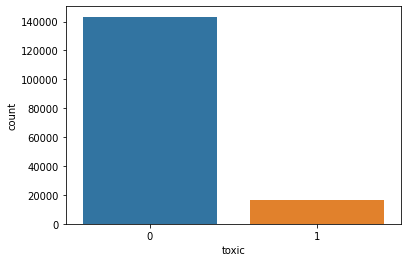

In [17]:
# Порстроим гистограмму распределения токсичных и нетоксичных комментариев
sns.countplot(x = 'toxic', data = comments)

### Очистка текста

In [3]:
# Создадим функцию для очистки текста
def text_cleaned(text):
    
    # Удалим лишние символы
    cleaned = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Приведем символы к нижнему регистру
    cleaned = cleaned.lower()
    final = ' '.join(cleaned.split())
    return final

In [4]:
%%time

# Применив функцию очистки текста создадим новый столбец 
comments['clean_text'] = comments['text'].apply(text_cleaned)

# Посмотрим результат
comments.head()

CPU times: user 3.56 s, sys: 60.1 ms, total: 3.62 s
Wall time: 3.61 s


,text,toxic,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,d aww he matches this background colour i m se...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man i m really not trying to edit war it s...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i can t make any real suggestions on impr...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...


### Лемматизация

In [5]:
# Создадим функцию лемматизацию
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    
    # Токенизируем текст
    word_list = nltk.word_tokenize(text)
    
    # Лемматизируем
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return lemmatized_output

In [6]:
%%time

# Применив функцию лемматизации создадим новый столбец 
comments['lemm_text'] = comments['clean_text'].apply(lemmatize)

# Посмотрим результат 
comments.sample(10)

CPU times: user 1min 10s, sys: 172 ms, total: 1min 10s
Wall time: 1min 10s


,text,toxic,clean_text,lemm_text
124064,I have added the paragraph that answers this q...,0,i have added the paragraph that answers this q...,i have added the paragraph that answer this qu...
61811,""":Talk:George_Thomas_Coker#Avruch.27s_2nd_prop...",0,talk george thomas coker avruch s nd proposal ...,talk george thomas coker avruch s nd proposal ...
35104,FYI \n\nA proposal has been made to create ...,0,fyi a proposal has been made to create a live ...,fyi a proposal ha been made to create a live f...
130419,"You hit the nail on the head, Ccrrccrr, in you...",0,you hit the nail on the head ccrrccrr in your ...,you hit the nail on the head ccrrccrr in your ...
72809,Needs Cleanup\nThis article needs work. It als...,0,needs cleanup this article needs work it also ...,need cleanup this article need work it also ne...
66436,Your message \n\nPlease do not educate me on w...,0,your message please do not educate me on wikip...,your message please do not educate me on wikip...
124243,Answer to Mütze\nYou dare contacting your frie...,1,answer to m tze you dare contacting your frien...,answer to m tze you dare contacting your frien...
109695,So Find an article about why freddey adu was n...,0,so find an article about why freddey adu was n...,so find an article about why freddey adu wa ne...
2791,You can't fucking block me for 3 months for fu...,1,you can t fucking block me for months for fuck...,you can t fucking block me for month for fucki...
148619,antares\n\nthis is one big motherfucker,1,antares this is one big motherfucker,antares this is one big motherfucker


### Создание выборок

In [10]:
# Создание признаков
features = comments['lemm_text']

# Создание целевого признака
target = comments['toxic']

# отделим 10% данных для тестовой выборки
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.2, random_state=12345)

# Сформируем таблицу для проверки разделения выборки
data = {'Размер выборки':[len(features_train), len(features_test)],
        'В % от общего количества':[len(features_train)/len(features)*100, len(features_test)/len(features)*100] } 
selections = pd.DataFrame(data, index =['Тренировочная выборка', 'Тестовая выборка' ]) 
display(selections)

,Размер выборки,В % от общего количества
Тренировочная выборка,127656,79.999499
Тестовая выборка,31915,20.000501


In [14]:
features_train_p, features_test_p, target_train_p, target_test_p = features_train, features_test, target_train, target_test 

### Векторизация данных 

In [8]:
# Загрузим базу стоп-слов
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
%%time

# Векторизуем данные
count_tf_idf = TfidfVectorizer(stop_words=stopwords)
tf_idf = count_tf_idf.fit(features_train)

features_train = tf_idf.transform(features_train)

features_test = tf_idf.transform(features_test)

CPU times: user 10.7 s, sys: 0 ns, total: 10.7 s
Wall time: 10.7 s


### Выводы

Проанализировав полученный датасет пришли к следующим выводам:
- исходный датафрейм был представлен неочищенным текстом на английском языке
- в целевом признаке наблюдается дисбаланс классов

Над исходными данными были проведены следующие действия:
- очистка текста от лишних символов и пробелов с приведением к нижнему регистру
- лемматизация текста
- созданы выборки для обучения моделей
- векторизованы данные с удалением стоп-слов

## Обучение

### Создание функции для сбора данных

In [25]:
#Создадим функцию для сбора данных
model_list = []
duration_list = []
duration_pred_list = []
rmse_list = []
gread_time_list = []

def summary (model, duration, duration_pred, rmse, gread_time):
    model_list.append(model)
    duration_list.append(duration)
    duration_pred_list.append(duration_pred)
    rmse_list.append(rmse)
    gread_time_list.append(gread_time)    

### Логистическая регрессия

In [22]:
%%time

model_lr = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced', penalty='l2')

# Начало отсчета времени выполнения ячейки
start_time = time.time()

# Зададим подбираемые параметры
param_grid = {'C':[1, 10, 100, 1000]}

grid_search_lr = GridSearchCV(estimator = model_lr, param_grid = param_grid, cv=2)

# Подберем параметры
grid_search_lr.fit(features_train, target_train)

# Расчет времени выполнения ячейки
duration_gread = time.time() - start_time

print(grid_search_lr.best_params_)

{'C': 10}
CPU times: user 2min 23s, sys: 2min 34s, total: 4min 58s
Wall time: 5min 1s


In [23]:
%%time

model_lr = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced', penalty='l2', C=10)

# Начало отсчета времени обучения модели
start_time = time.time()

# Обучаем модель на тренировочной выборке
model_lr.fit(features_train, target_train) 

#Расчет времени обучения модели
duration = time.time() - start_time

# Начало отсчета времени предсказания
start_time = time.time()

# предсказания модели на валидационной выборке
target_predict = pd.Series(model_lr.predict(features_test) )

#Расчет времени предсказания
duration_pred = time.time() - start_time

# Расчет RMSE
f1 = f1_score(target_test, target_predict).round(2) 


print('f1 на тестовой выборке', f1)

# Сбор данных
summary('LogisticRegression', duration, duration_pred, f1, duration_gread)

f1 на тестовой выборке 0.76
CPU times: user 13 s, sys: 11.8 s, total: 24.9 s
Wall time: 24.9 s


### Pipeline для Логистической регрессии

In [26]:
%%time

pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords)),
    ('model', LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l2', C=10)) 
    ])

pipe.fit(features_train_p, target_train_p)
y_valid_pred = pipe.predict(features_test_p)   
f1 = f1_score(target_test_p, y_valid_pred).round(2)
print('f1 на тестовой выборке', f1)

f1 на тестовой выборке 0.76
CPU times: user 18.4 s, sys: 12.4 s, total: 30.8 s
Wall time: 30.9 s


### Случайный лес

In [28]:
%%time

model_fc = RandomForestClassifier()

# Начало отсчета времени выполнения ячейки
start_time = time.time()

# Зададим подбираемые параметры
param_grid = {'max_depth':[20, 25], 'n_estimators': [80, 100]} #, 'max_depth':[7, 8, 9]}

grid_search_fc = GridSearchCV(estimator = model_fc, param_grid = param_grid, cv=2)

# Подберем параметры
grid_search_fc.fit(features_train, target_train)

# Расчет времени выполнения ячейки
duration_gread = time.time() - start_time

print(grid_search_fc.best_params_)

{'max_depth': 25, 'n_estimators': 80}
CPU times: user 5min 7s, sys: 0 ns, total: 5min 7s
Wall time: 5min 11s


In [29]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=25, class_weight='balanced') 
    
# Обучаем модель на тренировочной выборке
model_forest.fit(features_train, target_train) 
    
# предсказания модели на валидационной выборке
target_predict = pd.Series(model_forest.predict(features_test) )
        
# Расчет RMSE
f1 = f1_score(target_test, target_predict).round(2)

print('f1 на тестовой выборке', f1)

# Сбор данных
summary('RandomForestClassifier', duration, duration_pred, f1, duration_gread)

f1 на тестовой выборке 0.43


### Pipeline для Случайного леса

In [25]:
%%time

pipe = Pipeline([
    ('vectorizer', TfidfVectorizer(ngram_range=(1, 1), stop_words=stopwords)),
    ('model', RandomForestClassifier(random_state=12345, n_estimators=100, max_depth=25, class_weight='balanced')) 
    ])

pipe.fit(features_train_p, target_train_p)
y_valid_pred = pipe.predict(features_test_p)   
f1 = f1_score(target_test_p, y_valid_pred).round(2)
print('f1 на тестовой выборке', f1)

f1 на тестовой выборке 0.43
CPU times: user 19.9 s, sys: 0 ns, total: 19.9 s
Wall time: 19.9 s


### Результаты

In [30]:
# Поскольку тестирование моделей проводилось в предыдущем пункте, сформируем датафрейм
results_df = pd.DataFrame(index=['Название модели', 'Продолжительность обучения модели, сек.', 'Продолжительность предсказания, сек.',  
                                 'f1', 'Продолжительность подбора параметров'],
                          data=[model_list, duration_list, duration_pred_list, rmse_list, gread_time_list])

results_df

,0,1
Название модели,LogisticRegression,RandomForestClassifier
"Продолжительность обучения модели, сек.",24.56072,24.56072
"Продолжительность предсказания, сек.",0.014183,0.014183
f1,0.76,0.43
Продолжительность подбора параметров,301.45252,311.020025


## Выводы

По результатам анализа исходного датафрейма были произведены следующие действия:
- очистка текста от лишних символов и пробелов с приведением к нижнему регистру
- лемматизация текста
- векторизованы данные с удалением стоп-слов
- дисбаланс классов был учтен параметром class_weight='balanced' в обеих моделях
В результате проведенного исследования необходимого значения метрики F1 достигли только моделью LogisticRegression, модель RandomForestClassifier, несмотря на подбор параметров, с задачей не справилась.